In [21]:
import torch

ensemble_model_n = 20
ensemble_method_final_inter_thresh = [5, ] # 10, 15, 20
ensemble_method_final_bdd_mask_k = [0,1]
lt = 5
ld = [0,31]

tlist = []

for thr in ensemble_method_final_inter_thresh:
    for l in ld:
        for bdd in ensemble_method_final_bdd_mask_k:
            # for lt in ensemble_layer_till:
                tlist.append(torch.load(f'../../cache/llama/ensemble/qkvout_ensbn{ensemble_model_n}_mft{thr}_bmk{bdd}_lt{lt}_l{l}.pth', map_location=torch.device('cpu')))

In [22]:
import torch
import matplotlib.pyplot as plt
import math
import seaborn as sns

# Function to plot a grid of heatmaps for attention maps
def plot_attention_maps(tensor, cmap='rainbow'):
    num_attention_maps = tensor.shape[0]
    grid_cols = math.ceil(math.sqrt(num_attention_maps))
    grid_rows = math.ceil(num_attention_maps / grid_cols)
    mask = (tensor == 32000)
    tensor = torch.where(mask, -1, tensor)
    fig, axes = plt.subplots(grid_rows, grid_cols, figsize=(15, 10))
    for i, ax in enumerate(axes.flat):
        if i < tensor.shape[0]:
            sns.heatmap(tensor[i][:], ax=ax, cmap=cmap, cbar=True)
            ax.set_title(f'Attention Map {i+1} {tensor[i].shape}')
            ax.axis('off')  # Optional: Hide the axis ticks
        else:
            ax.axis('off')  # Hide unused plots
    plt.tight_layout()
    plt.show()

In [23]:
tlist[0]

{'q': tensor([[[[ 5.0781e-01, -1.2109e+00,  2.1250e+00,  ..., -9.3359e-01,
             8.0078e-01, -1.0859e+00],
           [ 5.8203e-01, -1.5625e+00,  2.0469e+00,  ..., -9.2578e-01,
             7.5391e-01, -1.0547e+00],
           [ 9.0234e-01, -1.6406e+00,  1.8828e+00,  ..., -8.3984e-01,
             6.6797e-01, -9.9219e-01],
           ...,
           [ 8.2812e-01,  1.5547e+00,  1.3438e+00,  ..., -6.4062e-01,
             2.2070e-01, -9.2188e-01],
           [ 3.6328e-01,  1.9375e+00,  1.5547e+00,  ..., -9.9219e-01,
             7.2656e-01, -1.1484e+00],
           [-7.2266e-02,  2.0156e+00,  1.4062e+00,  ..., -1.1016e+00,
             8.5938e-01, -1.2031e+00]],
 
          [[ 2.0605e-01, -8.8501e-03, -9.6094e-01,  ...,  8.3008e-02,
            -3.4570e-01,  1.2158e-01],
           [ 2.1289e-01,  5.5176e-02, -8.8281e-01,  ...,  2.7710e-02,
            -3.4961e-01,  8.1543e-02],
           [ 6.0059e-02,  2.0508e-02, -7.5781e-01,  ...,  2.1875e-01,
            -6.2891e-01,  3.0469e-

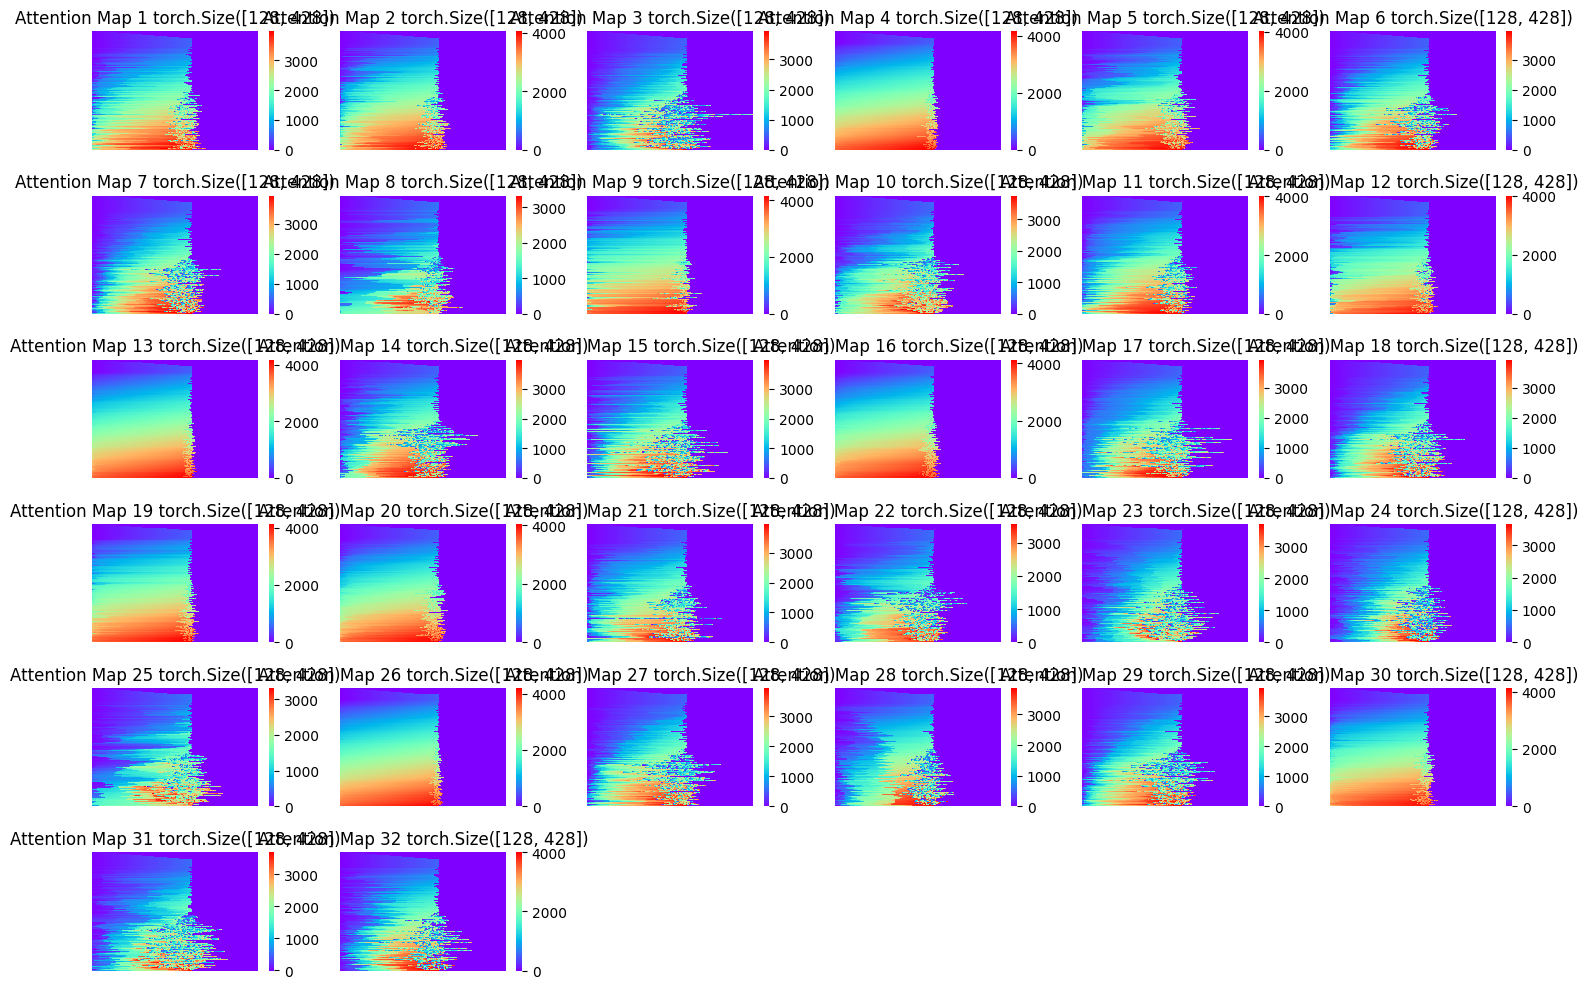

In [24]:
plot_attention_maps(tlist[0]['indices'])